## Assessing the available GPU

The following commands will tell you what GPU is available. Remember that if you want to actually use the GPU you must enable hardware acceleration under "Runtime/Change runtime type" otherwise you'll be using just the CPU (in this latter case you'll get something along the lines of "NVIDIA-SMI has failed").

Also keep in mind that the (free) GPU runtime is limited!

In [1]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi -L

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
GPU 0: Tesla T4 (UUID: GPU-fad25e12-f839-584b-8e8a-7cb78730d793)


## A first (actually second) encounter with Keras

`Keras` is a high-level Python library for **deep learning**: Keras is an API wrapper for `TensorFlow`, which is the **backend engine** that performs low-level computations (e.g. tensor products, convolutions, etc.).

[Don't worry if there are many terms that you don't fully understand now: we will go over these concepts repeatedly during the course, with increasing levels of detail]

Keras allows easy and fast deployment of neural networks models: the code chunk below imports `Keras` functions that define a specific neural network architecture:

- `Sequential()`: a network made up of a sequence of successive layers
- `Dense()`: fully-connected (dense) layers
- the type of **activation functions** to be used in each layer
- the number of units in each layer


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout

In [3]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=50)) #input shape of 50
model.add(Dense(28, activation='relu')) #input shape of 64
model.add(Dense(10, activation='softmax'))

## Model definition

As we saw above, the first step is to choose the neural network architecture and define the deep learning model.

We first use the `Sequential()` function to select the Keras API for the construction of deep learning models. Sequential models are a stack of layers, each with one input and one output tensor.

The function `add()` will then allow us to add subsequent layers to our deep learning model, by specifying the type of layer

In [4]:
model = Sequential()

### Dense layer

The first very common type of layer is the **Fully Connected** (dense) layer: we can specify the number of units in the layer and the activation function to use.

In [5]:
model.add(Dense(units = 32, activation='relu', input_shape=(12,12,3))) ##input shape: tensor size e.g. 12 x 12 pixels x 3 channels (RGB)

### Convolutional layer

Another common type of layers is the **convolutional layer** where we specify the number of filters, the size of the filter (kernel) and the activation function.


In [6]:
model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation='relu'))

### MaxPooling layer

MaxPooling layers downsample the input representation by taking the maximum value over the window defined by pool size for each dimension along the features axis ($\rightarrow$ dimensionality reduction)


In [7]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### Dropout layer

The **dropout layer** randomly sets input units to 0 with a specified frequency (`rate` argument) at each step during training, which helps prevent overfitting.

In [8]:
model.add(Dropout(rate = 0.5))

We can get an overview of the defined deep learning model by using the `model.summary()` function:

In [9]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12, 12, 32)        128       
                                                                 
 conv2d (Conv2D)             (None, 10, 10, 8)         2312      
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 8)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 5, 5, 8)           0         
                                                                 
Total params: 2440 (9.53 KB)
Trainable params: 2440 (9.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


We see that we have a large number of parameters to train in this model:

- 4 parameters (3 channels + bias term) per 32 units in the Dense layer $\rightarrow$ 128 parameters
- for convolutional layer number of parameter is computed as:
    - number_parameters = out_channels * (in_channels * kernel_h * kernel_w + 1)
    - the "+ 1" is for bias term
    - `out_channels` = number of units in current layers = 8
    - `in_channels` = number of units in previous layer = 32
    - `kernel_h` = `kernel_w` = 3
    - 8 * (32 * 3 * 3 + 1) = 2312


## Compiling the model

Once the model architecture has been defined, you go on compiling the model by setting up relevant configurations: **loss function**, **optimizer**, etc.

In [10]:
model.compile(loss='mean_squared_error', optimizer='adam')

The next steps would be to:

- fit the built and compiled model
- evaluate the model performance

You can find the Keras code for these two steps below: since we currently haven't loaded any data to work on, we commented out these lines of code, for us to see and discuss the syntax

In [ ]:
# model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))
# score = model.evaluate(x_test, y_test, batch_size=32)

## An example with simple linear regression

We now use Keras to fit a simple linear regression model:

$$
y = \mu + \beta x + e
$$

we start by generating data for the feature *x* and the target variable *y* (continuous)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1,2,200) ## generate 200 samples with values between 1 and 2
print(x.shape)
y = x*4 + np.random.randn(*x.shape) * 0.3 ## *x.shape is the number of random numbers to generate (* because x.shape is a tuple)

(200,)


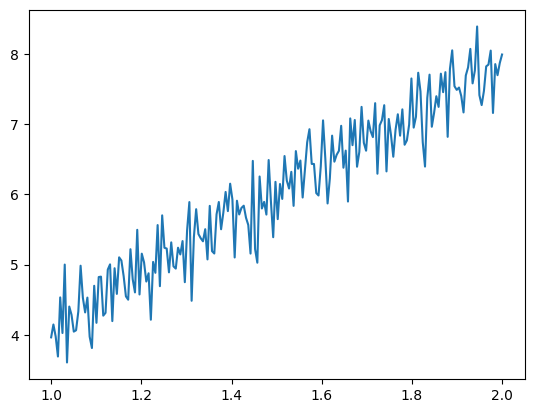

In [12]:
plt.plot(x,y)

We now build the neural networks model by specifying one Dense layer with one single unit. The activation function is `linear` (identity function). the input dimension is 1 (one feature)

In [13]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

We then compile the model, selecting *stochastic gradient descent* as optimizer and *mean square error* as loss function

In [14]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [15]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


We here have two parameters to train: the intercept $\mu$ and the slope $\beta$

We are now ready to fit our simple linear regression model with Keras. We define epochs=30 (30 iterations of optimization)

In [16]:
history = model.fit(x,y, epochs=30, shuffle=False)

Epoch 1/30
7/7 [==============================] - 4s 4ms/step - loss: 17.6403 - mse: 17.6403
Epoch 2/30
7/7 [==============================] - 0s 3ms/step - loss: 6.4051 - mse: 6.4051
Epoch 3/30
7/7 [==============================] - 0s 3ms/step - loss: 2.3666 - mse: 2.3666
Epoch 4/30
7/7 [==============================] - 0s 3ms/step - loss: 0.9254 - mse: 0.9254
Epoch 5/30
7/7 [==============================] - 0s 3ms/step - loss: 0.4173 - mse: 0.4173
Epoch 6/30
7/7 [==============================] - 0s 3ms/step - loss: 0.2420 - mse: 0.2420
Epoch 7/30
7/7 [==============================] - 0s 3ms/step - loss: 0.1838 - mse: 0.1838
Epoch 8/30
7/7 [==============================] - 0s 3ms/step - loss: 0.1658 - mse: 0.1658
Epoch 9/30
7/7 [==============================] - 0s 3ms/step - loss: 0.1611 - mse: 0.1611
Epoch 10/30
7/7 [==============================] - 0s 3ms/step - loss: 0.1604 - mse: 0.1604
Epoch 11/30
7/7 [==============================] - 0s 3ms/step - loss: 0.1607 - mse: 0.

Finally, we are ready to evaluate the fitted deep learning model.
First, we look at predicted vs observed values: using the fitted model, we predict values for our 200 generated samples

In [17]:
predict = model.predict(x)
y_hat = predict.reshape(200,)
print(y.shape)
print(y_hat.shape)

## correlation coefficient
print(np.corrcoef(y,y_hat))
print("The correlation between observed and predicted y's is: ", np.corrcoef(y,y_hat)[0,1])

7/7 [==============================] - 0s 2ms/step
(200,)
(200,)
[[1.         0.95410499]
 [0.95410499 1.        ]]
The correlation between observed and predicted y's is:  0.9541049903352432


### Question

Why do you think that we have such high predictive accuracy?

In [ ]:
plt.scatter(y_hat, y)
plt.show()

We can plot the decay of the loss over epochs, using results saved in the `history` object

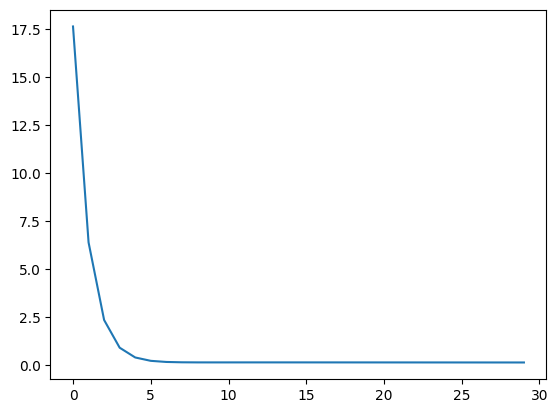

In [19]:
plt.plot(history.history['loss'])

We can also retrieve the weights (coefficients) estimated in the final layer:

In [18]:
model.get_weights()

[array([[3.1575272]], dtype=float32), array([1.3616047], dtype=float32)]

## Exercise 2.1 [optional]: do-it-together

Using the `scikitlearn` dataset `diabetes`, you should fit a simple linear regression model with **Keras**:

- select one feature from the data (age, sex, bmi etc.)
- build your Keras model
- compile the model
- fit the model
- evaluate the model

We have prepared the data loading step for you:

In [ ]:
import pandas as pd
import sklearn.datasets

diabetes = sklearn.datasets.load_diabetes()
diabetes.data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) #converting numpy array -> pandas DataFrame
diabetes.target = pd.Series(diabetes.target)

In [ ]:
print(diabetes.DESCR)

In [ ]:
diabetes.data ## features

In [ ]:
diabetes.target ## quantitative measure of disease progression

Now it's our turn to play a bit with basic Keras: let's enjoy it!